In [17]:
# The ``inline`` flag will use the appropriate backend to make figures appear inline in the notebook.  
%matplotlib inline

import pandas as pd
import numpy as np

# `plt` is an alias for the `matplotlib.pyplot` module
import matplotlib.pyplot as plt

# import seaborn library (wrapper of matplotlib)
import seaborn as sns

# Using the scikit-learn library to load a dataset
from sklearn.datasets import load_digits



## Heat Maps


In [2]:
confusion = np.array([[37, 0,  0,  0,  0,  0,  0,  0,  0,  0],
                      [0, 39,  0,  0,  0,  0,  1,  0,  2,  1],
                      [0,  0, 41,  3,  0,  0,  0,  0,  0,  0],
                      [0,  0,  0, 44,  0,  0,  0,  0,  1,  0],
                      [0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
                      [0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
                      [0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
                      
                      [0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
                      [0,  3,  1,  0,  0,  0,  0,  0, 44,  0],
                      [0,  0,  0,  0,  0,  1,  0,  0,  2, 44]])


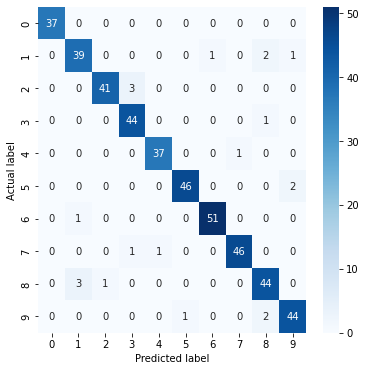

In [3]:
# sequential Sequential: appropriate when data ranges from relatively low
# (uninteresting values) to relatively high (interesting values). 
plt.figure(figsize=(6,6))
sns.heatmap(confusion, 
            annot=True,
            cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

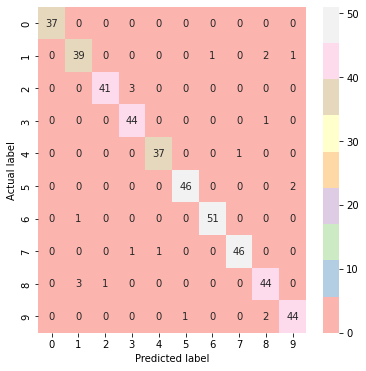

In [4]:
# Qualitative colormaps are best when you want to distinguish discrete
# chunks of data that <b>do not have inherent ordering</b>.


plt.figure(figsize=(6,6))
sns.heatmap(confusion, 
            annot=True,
            cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


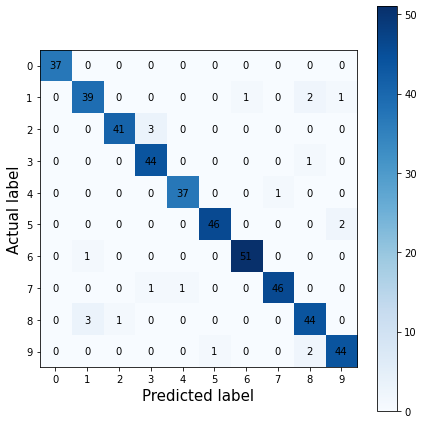

In [5]:
# Using matplot lib 

# this is a lot of code that is not trivial to create
plt.figure(figsize=(6,6))
plt.imshow(confusion, interpolation='nearest', cmap='Blues')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = confusion.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(confusion[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

## Histograms

In [7]:
# Load data

df = pd.read_csv('data/kingCountyHouseData.csv');
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df['price'].head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

<AxesSubplot:>

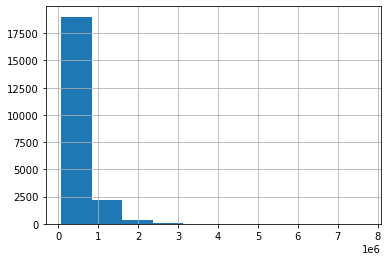

In [9]:
# Using the default settings is not a good idea
# Keep in mind that visualizations are an interative process.
df['price'].hist()

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.,  9000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

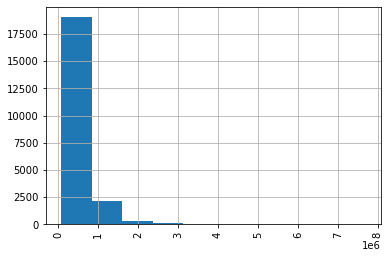

In [10]:
# One solution is to rotate your xticklabels
df['price'].hist()
plt.xticks(rotation = 90)


In [13]:
# if you want a quick solution to make the xticklabels readable,
# try changing the plot style 
plt.style.use('seaborn')

<AxesSubplot:>

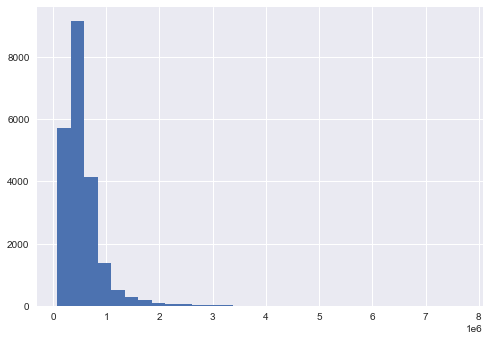

In [14]:
# Change the number of bins
# Seems better, but we still have empty space
df['price'].hist(bins = 30)

<AxesSubplot:>

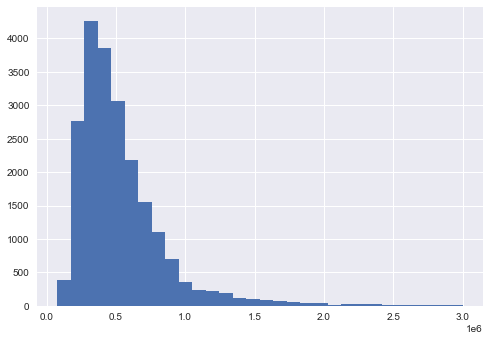

In [15]:
# visualizing a subset of the data
price_filter = df.loc[:, 'price'] <= 3000000
df.loc[price_filter, 'price'].hist(bins = 30)

<AxesSubplot:>

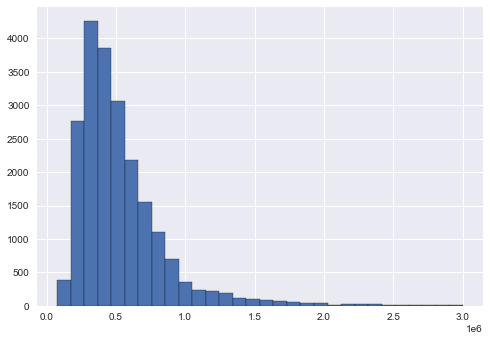

In [16]:
# you can also change the edgecolor and linewidth
price_filter = df.loc[:, 'price'] <= 3000000

# you can also change the edgecolor and linewidth
df.loc[price_filter, 'price'].hist(bins = 30,
                                   edgecolor='black')

## Subplot


In [18]:
# Load digits dataset
filename = 'data/digitsDataset.csv'
df = pd.read_csv(filename)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [21]:
# show image
pixel_colnames = df.columns[:-1]
pixel_colnames

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63'],
      dtype='object')

In [25]:
# get all columns except the label column for the first image

image_values = df.loc[0, pixel_colnames].values
image_values

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [26]:
image_values.shape

(64,)

In [27]:
# The images are 8 pixels by 8 pixels. It is important to keep in mind that just 
# because a dataset is stored in a certain way, doesnt mean it was meant to
# be viewed that way. 

In [28]:
image_values.reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

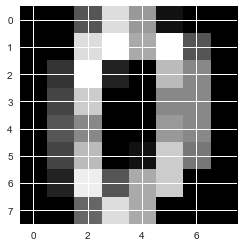

In [29]:
# visualize the image

plt.imshow(image_values.reshape(8,8), cmap ='gray')

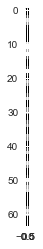

In [30]:
# this is not the format the image should be in. 
plt.imshow(image_values.reshape(64, 1), cmap = 'gray')

In [50]:
# There is a large amount of replicated code

plt.figure(figsize=(10,2))

<Figure size 720x144 with 0 Axes>

<Figure size 720x144 with 0 Axes>

Text(0.5, 1.0, 'Label: 4')

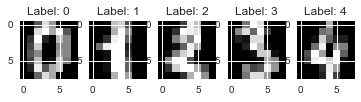

In [49]:
## The first image
plt.subplot(1, 5, 1)
image_values = df.loc[0, pixel_colnames].values
image_label = df.loc[0, 'label']
plt.imshow(image_values.reshape(8,8), cmap ='gray')
plt.title('Label: ' + str(image_label))

# The second image
plt.subplot(1, 5, 2)
image_values = df.loc[1, pixel_colnames].values
image_label = df.loc[1, 'label']
plt.imshow(image_values.reshape(8,8), cmap ='gray')
plt.title('Label: ' + str(image_label))

# The third image
plt.subplot(1, 5, 3)
image_values = df.loc[2, pixel_colnames].values
image_label = df.loc[2, 'label']
plt.imshow(image_values.reshape(8,8), cmap ='gray')
plt.title('Label: ' + str(image_label))

# The fourth image
plt.subplot(1, 5, 4)
image_values = df.loc[3, pixel_colnames].values
image_label = df.loc[3, 'label']
plt.imshow(image_values.reshape(8,8), cmap ='gray')
plt.title('Label: ' + str(image_label))

# The fifth image
plt.subplot(1, 5, 5)
image_values = df.loc[4, pixel_colnames].values
image_label = df.loc[4, 'label']
plt.imshow(image_values.reshape(8,8), cmap ='gray')
plt.title('Label: ' + str(image_label))


## Using a loop

In [47]:
# range(0,5) produces a sequence of integers from 0
# up to but not including 5
list(range(0,5))

[0, 1, 2, 3, 4]

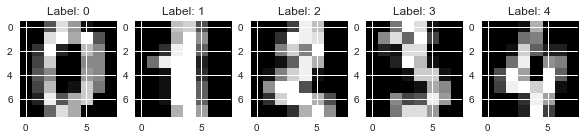

In [48]:
# This is a lot less code

plt.figure(figsize=(10,2))
for index in range(0, 5):

    plt.subplot(1, 5, 1 + index )
    image_values = df.loc[index, pixel_colnames].values
    image_label = df.loc[index, 'label']
    plt.imshow(image_values.reshape(8,8), cmap ='gray')
    plt.title('Label: ' + str(image_label))